## EE6130 - Computational Nanoelectronics
###  Assignment 1

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh 
import re

# Question 1

The inter-atomic potential energy of a diatomic molecule is modelled by Lenard-Jones potential, $U(r)$

$U(d) = 4\epsilon[(\sigma/d)^{12}-(\sigma/d)^6] $

Here the σ and ε are parameters σ = 0.31589 nm, ε = 775 Joules/mol.

(a) Plot the Lenard Jones Potential. Please mark the x and y axis label clearly 

(b) Calculate the bond length of an a molecule with parameters specified.

(c) Verify that your solution is correct. 

Note: The net force acting on an atom is given by (F = −$\nabla$U (r))

In [37]:
def LJpotential(epsilon,sigma,d): # Lenard-Jones Potential
    return 4*epsilon*((sigma/d)**12-(sigma/d)**6)


def LJ_ComputeAndPlot(epsilon,sigma,d): # Function to plot LJ potential vs d
    LJ = LJpotential(epsilon,sigma,d)
    plt.plot(d,LJ)
    plt.xlabel('d (nm)')
    plt.ylabel('$U(r)$ Joules/mol')
    plt.title('Lenard-Jones Potential \n $U(d)=4\epsilon[(\sigma/d)^{12}-(\sigma/d)^6]$')
    plt.show()
    return LJ



#### 1 (a)

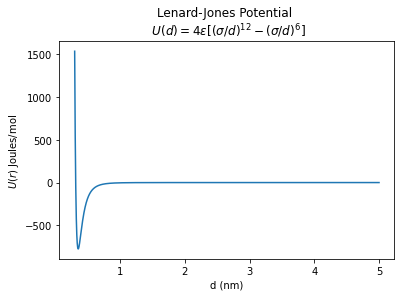

In [38]:
d = np.linspace(0.3,5,5000) # sample ds 

LJ = LJ_ComputeAndPlot(epsilon=775,sigma=0.31589,d=d)

#### 1 (b)

In [39]:
min_inx = list(LJ).index(min(LJ))
print('The bond length of a molecule with the parameters specified is {:.3f}nm'.format(d[min_inx]))
print('Explanation: The system exists in equilibrium, hence is in a state with minimum potential energy (Net force = 0).')

The bond length of a molecule with the parameters specified is 0.355nm
Explanation: The system exists in equilibrium, hence is in a state with minimum potential energy (Net force = 0).


##### 1 (c)
##### Verification of the solution:
\begin{align}
F = -\nabla(U) = -\frac{4\epsilon}{d^2}[12(\frac{\sigma}{d})^{11}-6(\frac{\sigma}{d})^5]
\end{align}


For equilibrium, net force = 0. Therefore, 

\begin{equation}
12(\frac{\sigma}{d})^{11}-6(\frac{\sigma}{d})^5 = 0\ \ \  \because d\neq 0 \\
\implies \frac{d}{\sigma}^6 = 2 \\
\implies d = \sigma 2^{1/6}
\end{equation}


In [36]:
sigma=0.31589
print('The analytically obtained bond length is {:.3f} nm'.format(sigma*pow(2,1/6))) 

The analytically obtained bond length is 0.355 nm


Given $\sigma = 0.31589$, bond length $= 0.355$,

The solution is verified

# Question 2

Consider a circuit shown below: Calculate the current through the diode for the following parameters
<div> <img src=attachment:image.png alt="circuit" style="width: 300px;"/></div> 

The current through diode is $I_D = I_0[\exp(\frac{V_D}{\eta V_T})-1]$

$R1 = 1k\Omega, R2 = 3k\Omega, R3 = 4k\Omega, R4 = 2k\Omega$

$I_0 = 3nA, \eta = 2$

Assume the supply is $5V$ 
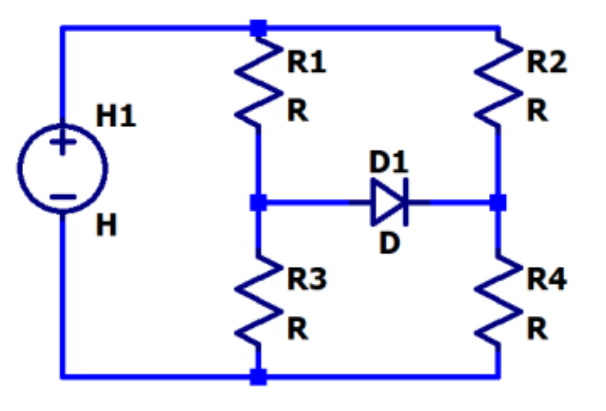

In [3]:
class resistor:
    def __init__(self,R=None,end1=None,end2=None):
        self.R = R
    def voltage(I):
        return I*self.R
    def current(V):
        return V/self.R
    
class diode:
    def __init__(self,I0='3n',eta=2,Vt='26mV'):
        pass
    
class network:
    def __init__(self,n=0):
        self.n=n
        
        
        

In [5]:
def getvalue(string): # to extract the value of a circuit element 
    units = {'m':1e-3,'k':1e3,'M':1e6,'G':1e9,'n':1e-9,'u':1e-6,'p':1e-12}
    '''
    current bugs:
    module will ignore unrecognised units and use the preceeding float/int value
    '''    
    try:
        temp = re.compile("([0-9]+)(.)([0-9]+)([a-zA-Z]+)")
        res = temp.match(string).groups()
        value = float(res[0]+'.'+res[2])
        exp = units[res[3][0]]
        return value*exp
    except:
        temp = re.compile("([0-9]+)(.)([0-9]+)")
        res = temp.match(string).groups()
        value = float(res[0]+'.'+res[2])
        return value
